# 🧩 Reto 4 – Integración de resultados
**Objetivo:** combinar resultados parciales en un diagnóstico integral por sitio.

### Pasos
1. Carga `resultado_temperatura.csv`, `resultado_ph.csv`, `resultado_oxigeno.csv`.
2. Únelos por `sitio` usando `merge`.
3. Crea `diagnostico_final` con reglas (parcial/total/normal).
4. Exporta `diagnostico_final.csv`.
5. Cuenta categorías con `value_counts()`.

> **Reto adicional:** gráfico de barras de distribución.

Distribución de diagnósticos:
diagnostico_final
parcial    2
Name: count, dtype: int64


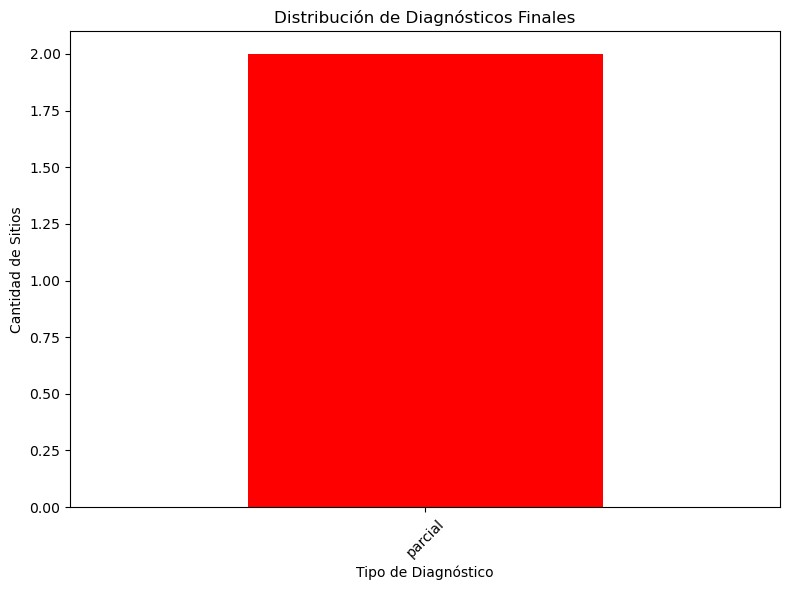

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def diagnostico_final():
    # 1. Cargar los archivos
    df_temp = pd.read_csv("temperatura.csv")
    df_ph = pd.read_csv("resultado_ph.csv") 
    df_oxigeno = pd.read_csv("resultado_oxigeno.csv")
    
    # 2. Unir por sitio usando merge (paso a paso)
    df_merge1 = pd.merge(df_temp, df_ph, on="sitio", how="inner")
    df_completo = pd.merge(df_merge1, df_oxigeno, on="sitio", how="inner")
    
    # 3. Crear diagnostico_final con reglas
    # Ejemplo de reglas (ajusta según tus criterios reales):
    condiciones = [
        (df_completo['riesgo_termico'] == 'Riesgo') | 
        (df_completo['alerta_quimica'] == 'Revisión requerida') | 
        (df_completo['riesgo_biologico'] == 'Riesgo'),
        
        (df_completo['riesgo_termico'] == 'Riesgo') & 
        (df_completo['alerta_quimica'] == 'Revisión requerida') & 
        (df_completo['riesgo_biologico'] == 'Riesgo'),
        
        (df_completo['riesgo_termico'] == 'No riesgo') & 
        (df_completo['alerta_quimica'] == 'Estable') & 
        (df_completo['riesgo_biologico'] == 'No riesgo')
    ]
    
    categorias = ['parcial', 'total', 'normal']
    df_completo['diagnostico_final'] = np.select(condiciones, categorias, default='parcial')
    
    # 4. Exportar
    df_completo.to_csv("diagnostico_final.csv", index=False)
    
    # 5. Contar categorías
    conteo = df_completo['diagnostico_final'].value_counts()
    print("Distribución de diagnósticos:")
    print(conteo)
    
    # Reto adicional: gráfico de barras
    plt.figure(figsize=(8, 6))
    conteo.plot(kind='bar', color=['red', 'orange', 'green'])
    plt.title("Distribución de Diagnósticos Finales")
    plt.xlabel("Tipo de Diagnóstico")
    plt.ylabel("Cantidad de Sitios")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('distribucion_diagnosticos.png')
    plt.show()
    
    return df_completo

# Ejecutar la función
resultado = diagnostico_final()